# Principal Component Analysis

In [125]:
import numpy as np
import pandas as pd

In [126]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [127]:
#dropping useless columns
data.drop('Unnamed: 32', axis=1, inplace=True)

In [128]:
import seaborn as sns
# numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns
# correlation matrix

corrmat = data[numerical_columns].corr()

In [129]:
corrmat

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


from the table we see perimeter_mean and radius mean are most corelated so we Try combine those

In [130]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


data is does not have missing values

In [131]:
new_data = data[['perimeter_mean','radius_mean']]
new_data

,perimeter_mean,radius_mean
0,122.80,17.99
1,132.90,20.57
2,130.00,19.69
3,77.58,11.42
4,135.10,20.29
...,...,...
564,142.00,21.56
565,131.20,20.13
566,108.30,16.60
567,140.10,20.60


In [132]:
def z_score(data):
  for col in data.columns:
    col_mean = data[col].mean()
    col_std = data[col].std()
    data[col] = (data[col] - col_mean)/col_std

  return data

new_data = z_score(new_data)

<ipython-input-132-8592f17c384a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] - col_mean)/col_std


<Axes: >

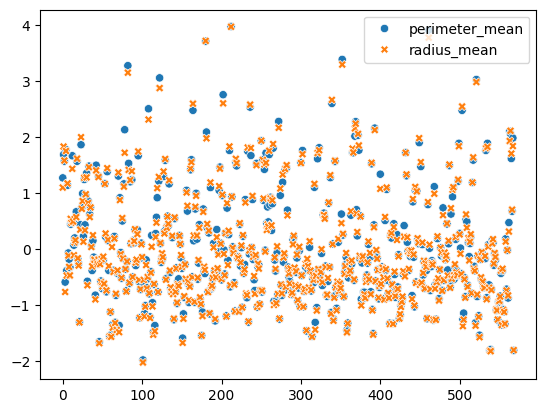

In [133]:
# scatter plot of new_data

sns.scatterplot(data=new_data)


<Axes: xlabel='perimeter_mean', ylabel='radius_mean'>

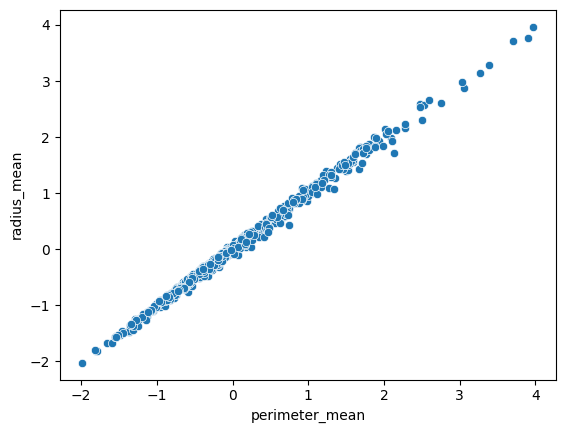

In [134]:
sns.scatterplot(data= new_data, x='perimeter_mean', y='radius_mean')

In [135]:
def covariance(data):

    n = data.shape[0]
    arr1 = data.iloc[:, 0].to_numpy()  # Convert Series to NumPy array
    arr2 = data.iloc[:, 1].to_numpy()


    mean_arr1 = np.mean(arr1)
    mean_arr2 = np.mean(arr2)

    sum = 0
    for i in range(n):
        sum += (arr1[i] - mean_arr1) * (arr2[i] - mean_arr2)

    return sum/(n-1)

In [136]:
def covariance_matrix(data):
  # using formula
  cov_matrix = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      selected_data = data.iloc[:, [i, j]]
      cov_matrix[i][j] = covariance(selected_data)

  return cov_matrix

cov_matrix = covariance_matrix(new_data)

cov_matrix

array([[1.        , 0.99785528],
       [0.99785528, 1.        ]])

<Axes: >

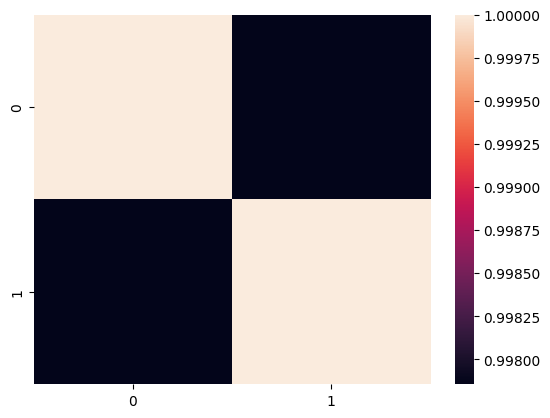

In [137]:
sns.heatmap(cov_matrix)

In [138]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

print(f"The Eigenvalues:\n {eigenvalues}")
print(f"Eigenvectors:\n {eigenvectors}")

The Eigenvalues:
 [0.00214472 1.99785528]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


In [139]:
# find index of max element in eigenvalues
max_index = np.argmax(eigenvalues)

max_index

1

In [145]:
# thus our eigenvector is
eigenvector1 = eigenvectors[1]
eigenvector2 = eigenvectors[0]

In [150]:
def PCA_transform(data, eigenvector):

    transformed_table = data.to_numpy()


    transformed_table = np.dot(transformed_table, eigenvector)


    return transformed_table


PC1 = PCA_transform(new_data, eigenvector1)

transformed_data = pd.DataFrame({'PC1': PC1})


transformed_data

,PC1
0,-1.672249
1,-2.483843
2,-2.222879
3,0.961948
4,-2.491681
...,...
564,-2.947301
565,-2.346086
566,-0.971389
567,-2.699385


In [151]:
new_data

,perimeter_mean,radius_mean
0,1.268817,1.096100
1,1.684473,1.828212
2,1.565126,1.578499
3,-0.592166,-0.768233
4,1.775011,1.748758
...,...,...
564,2.058974,2.109139
565,1.614511,1.703356
566,0.672084,0.701667
567,1.980781,1.836725


In [154]:
new_data['PC1'] = transformed_data

<ipython-input-154-db97c8bb3f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['PC1'] = transformed_data


<Axes: xlabel='perimeter_mean', ylabel='PC1'>

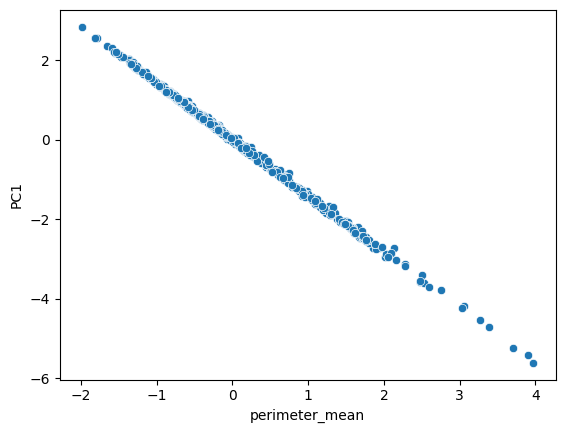

In [155]:
sns.scatterplot(data = new_data, x = 'perimeter_mean', y = 'PC1')

<Axes: xlabel='radius_mean', ylabel='PC1'>

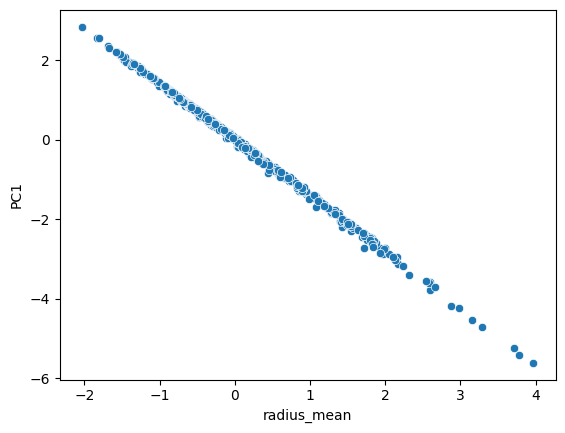

In [159]:
sns.scatterplot(data = new_data, x = 'radius_mean', y = 'PC1')